<a href="https://colab.research.google.com/github/jimohola/Object_detection_YOLOv5/blob/main/Object_detection_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>

</div>

# 1. Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


# 2. Unzip Data

In [2]:
!unzip -q /content/Training.zip -d ../

# 3. Train Model




In [29]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 150 --data /content/yolov5/data/new_CH_coco128.yaml --weights yolov5s.pt --cache

2023-12-24 21:00:46.214796: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-24 21:00:46.214846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-24 21:00:46.216135: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/new_CH_coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=

# 4. Test Model

### 4. Test Model on Image

In [30]:
!python detect.py --weights runs/train/exp6/weights/best.pt --img 640 --conf 0.25 --source /content/training/images/val

detect: weights=['runs/train/exp6/weights/best.pt'], source=/content/training/images/val, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/19 /content/training/images/val/51.jpg: 416x640 1 Cock, 49.4ms
image 2/19 /content/training/images/val/52.jpg: 416x640 3 Hens, 1 Cock, 8.4ms
image 3/19 /content/training/images/val/53.jpg: 640x480 2 Hens, 1 Cock, 54.3ms
image 4/19 /content/training/images/val/54.jpg: 448x640 1 Hen, 1 Cock, 51.1ms
image 5/19 /co

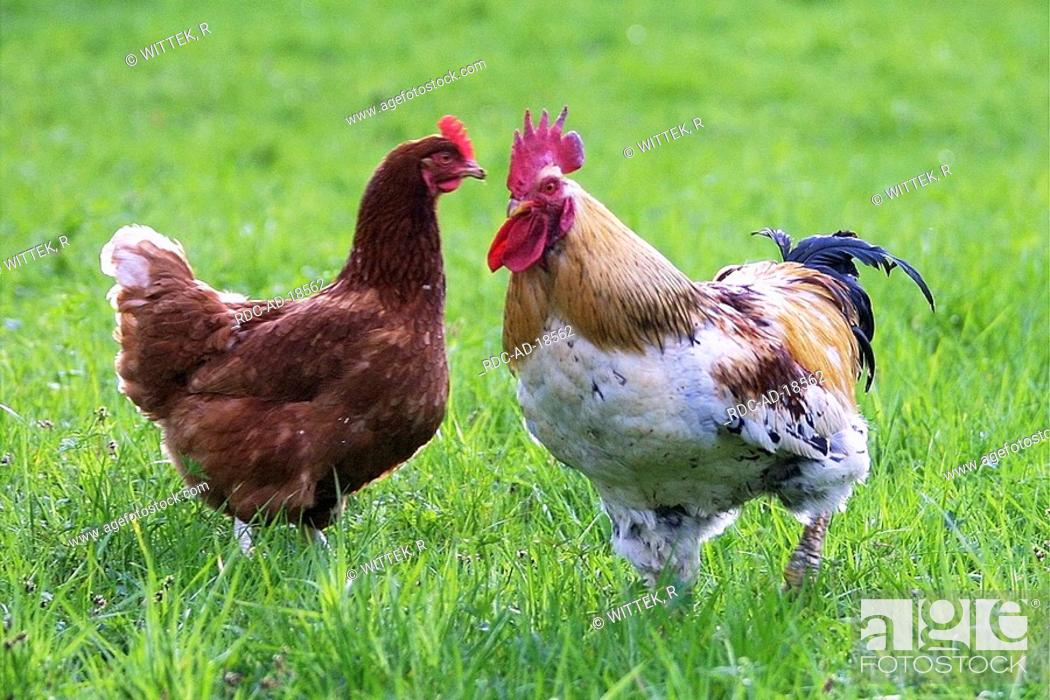

In [32]:
# Sample Result 1
display.Image(filename='/content/training/images/val/57.jpg', width=600)

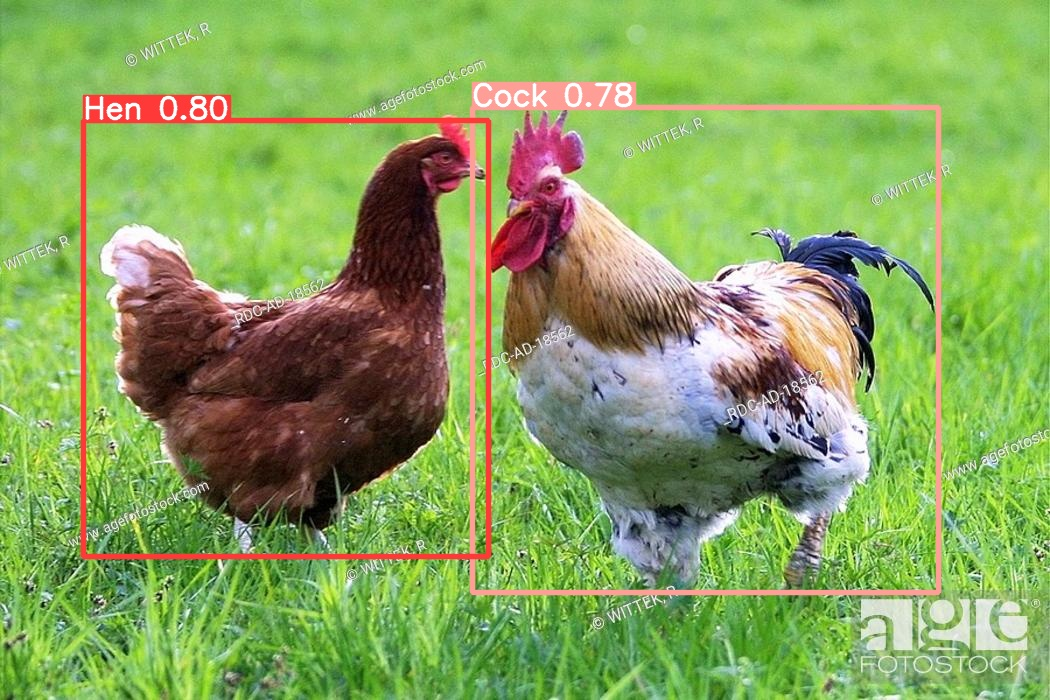

In [31]:
display.Image(filename='/content/yolov5/runs/detect/exp3/57.jpg', width=600)

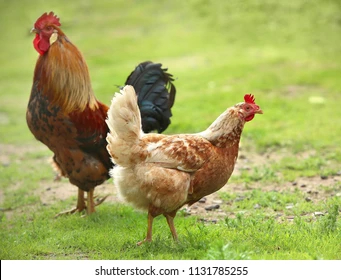

In [35]:
# Sample Result 2
display.Image(filename='/content/training/images/val/59.jpg', width=600)

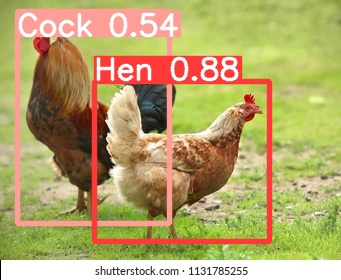

In [33]:
display.Image(filename='/content/yolov5/runs/detect/exp3/59.jpg', width=600)

### 4. Test Model on Video

In [34]:
!python detect.py --weights runs/train/exp6/weights/best.pt --img 640 --conf 0.25 --source /content/Chicken_and_hen_Video.mp4

detect: weights=['runs/train/exp6/weights/best.pt'], source=/content/Chicken_and_hen_Video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/255) /content/Chicken_and_hen_Video.mp4: 384x640 3 Hens, 3 Cocks, 56.1ms
video 1/1 (2/255) /content/Chicken_and_hen_Video.mp4: 384x640 5 Hens, 3 Cocks, 9.2ms
video 1/1 (3/255) /content/Chicken_and_hen_Video.mp4: 384x640 4 Hens, 1 Cock, 9.1ms
video 1/1 (4/255)